### Choosing the best scalar based on data

In [5]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier



In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X=df[['sepal_length','sepal_width']]
y=df['species']== 'setosa'

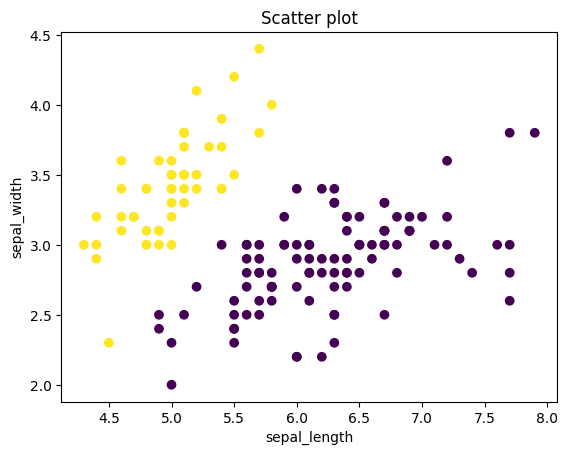

(array([[ 0.,  0.,  0.,  1., 21., 37., 36., 35., 13.,  7.],
        [19., 75., 44., 11.,  1.,  0.,  0.,  0.,  0.,  0.]]),
 array([2.  , 2.59, 3.18, 3.77, 4.36, 4.95, 5.54, 6.13, 6.72, 7.31, 7.9 ]),
 <a list of 2 BarContainer objects>)

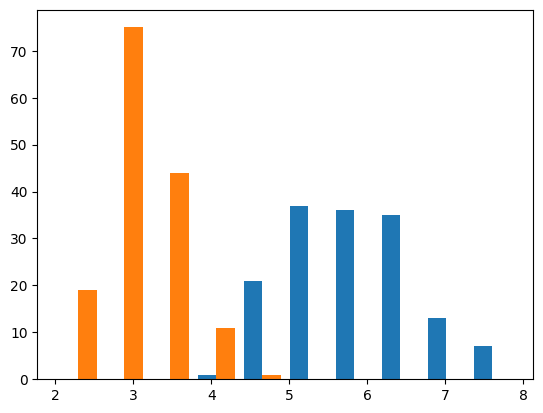

In [80]:
# make a scatter plot
#sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df)
plt.scatter(X['sepal_length'],X['sepal_width'], c=y)
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# make a histogram
plt.hist(X, bins=10)

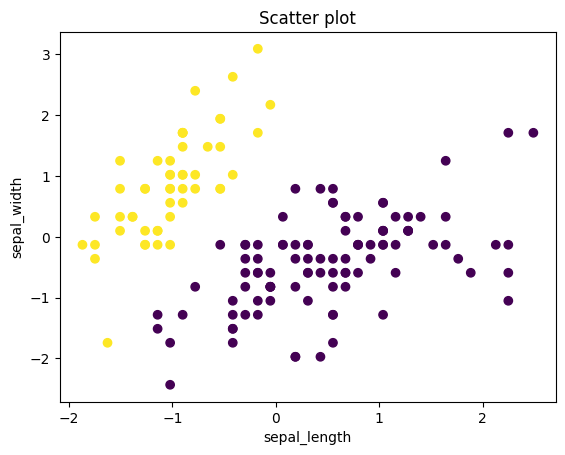

(array([[ 0., 11., 34., 20., 30., 25., 18.,  6.,  6.,  0.],
        [ 4.,  7., 22., 24., 50., 18., 10., 11.,  2.,  2.]]),
 array([-2.43394714, -1.8814749 , -1.32900266, -0.77653042, -0.22405819,
         0.32841405,  0.88088629,  1.43335853,  1.98583077,  2.53830301,
         3.09077525]),
 <a list of 2 BarContainer objects>)

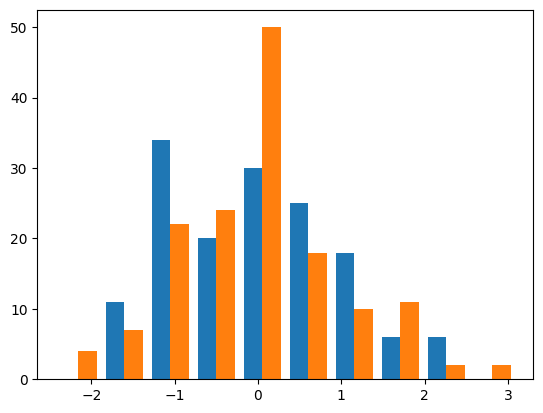

In [81]:
# apply standard scaler
X_scaled1=StandardScaler().fit_transform(X)

# make a scatter plot
plt.scatter(X_scaled1[:,0],X_scaled1[:,1], c=y)
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()
# make a histogram
plt.hist(X_scaled1, bins=10)


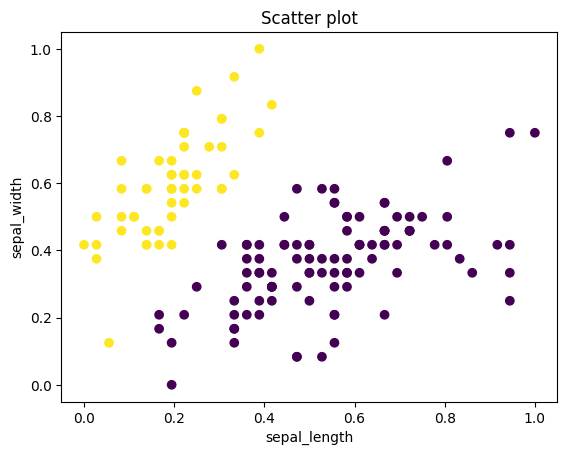

(array([[ 9., 23., 14., 27., 22., 20., 18.,  6.,  5.,  6.],
        [ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

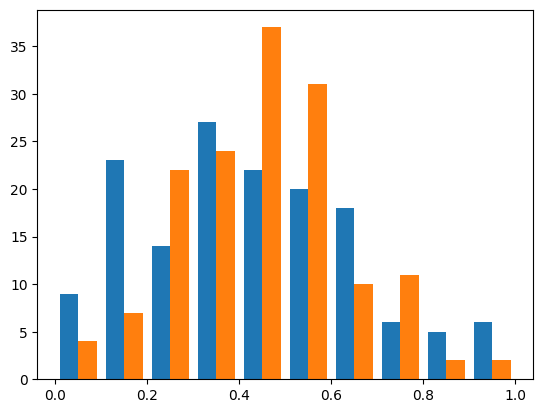

In [82]:
# apply minmax scaler
X_scaled2=MinMaxScaler().fit_transform(X)

# make a scatter plot
plt.scatter(X_scaled2[:,0],X_scaled2[:,1], c=y)
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()
# make a histogram
plt.hist(X_scaled2, bins=10)

c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


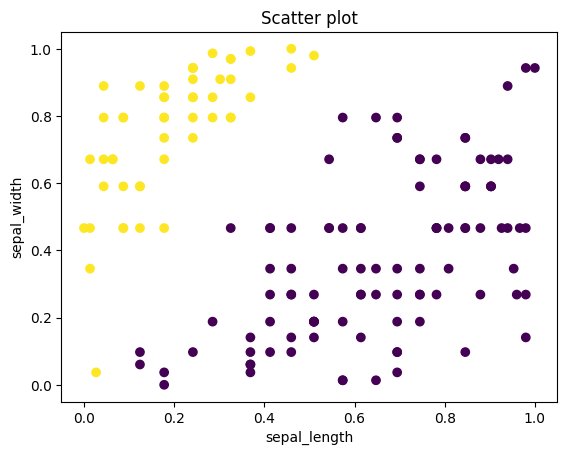

(array([[16., 16., 13., 14., 14., 16., 19., 12., 13., 17.],
        [19., 14., 14., 10., 26., 11., 13., 18., 10., 15.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

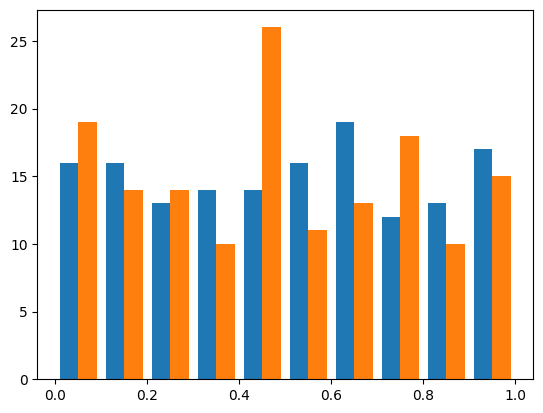

In [83]:
# apply quantile transformer
X_scaled3=QuantileTransformer().fit_transform(X)

# make a scatter plot
plt.scatter(X_scaled3[:,0],X_scaled3[:,1], c=y)
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

# make a histogram
plt.hist(X_scaled3, bins=10)

#### Now let's see how we can choose the best scalar based on the data we have.

In [75]:
def plot_output(scalar):
    pipe=Pipeline([('scalar',scalar),
                   ('knn',KNeighborsClassifier())
                   ])
    
    pred=pipe.fit(X,y).predict(X)

    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(X['sepal_length'],X['sepal_width'], c=y)
    plt.title('Original data')
    plt.subplot(132)
    X_tfm=scalar.fit_transform(X)
    plt.scatter(X_tfm[:,0],X_tfm[:,1], c=y)
    plt.title('Transformed data')
    plt.subplot(133)
    X_new=np.concatenate([
        np.random.uniform(0, X['sepal_length'].max(), size=(5000,1)),
        np.random.uniform(0, X['sepal_width'].max(), size=(5000,1))
    ], axis=1)

    y_proba=pipe.predict_proba(X_new)
    plt.scatter(X_new[:,0],X_new[:,1], c=y_proba[:,1], alpha=0.5)
    plt.title('Predicted data')



c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


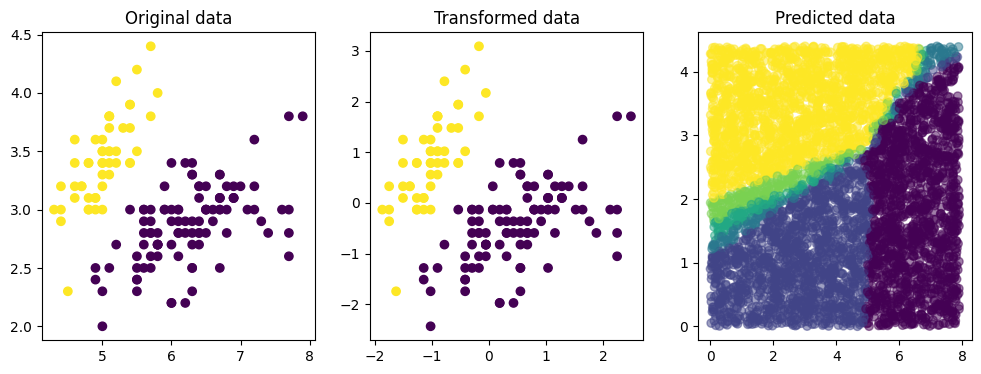

In [77]:
# plot the output for StandardScaler
plot_output(scalar=StandardScaler())

c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


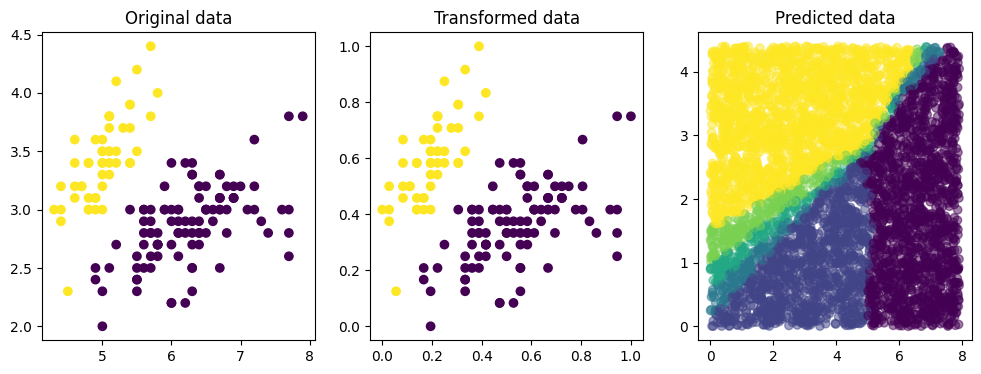

In [78]:
# plot the output for MinMaxScaler
plot_output(scalar=MinMaxScaler())

c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Ambitious\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


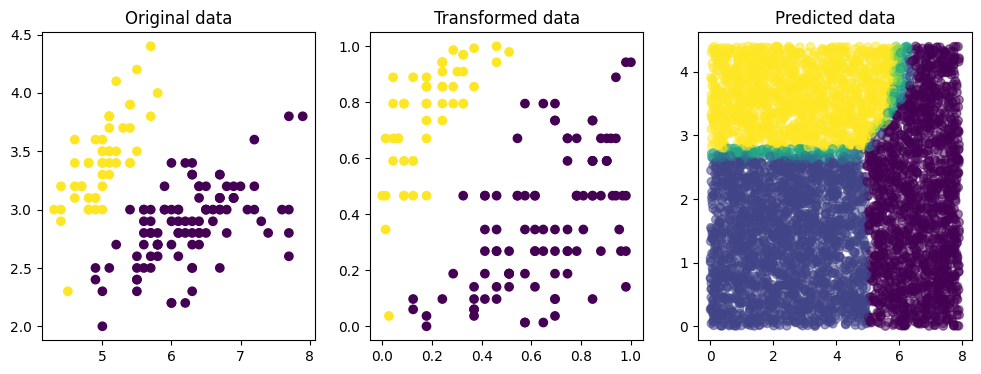

In [79]:
# plot the output for QuantileTransformer
plot_output(scalar=QuantileTransformer())

#### We can see that the data for X was almost normally distributed, so we can use standard scalar for it that performs best on normally distributed data.
#### minmax scalar also performed well on the data and can also be used alternatively.
#### If the data is not normally distribued and contains outliers, then we can use Quantile Transformer scalar.